runs the same code as heat_1d_1d_example.ipynb but now with the new heat_nn implementation

In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from heat_612 import heat_nn
import copy
import matplotlib.pyplot as plt
np.random.seed(238)

torch.manual_seed(301)

In [2]:
layers = [32, 64, 128, 128, 1]
#in this example: the output layer uses identity as activation func and all the hidden layers use tanh
activations = [torch.tanh]*(len(layers)-1) + [None]
dim=1
kappa = 0.1
u_0 = lambda x: torch.sin(torch.pi * x) + torch.sin(4 * torch.pi * x)
rhs = lambda x, t: torch.sin(torch.pi * x)
u_analytic = lambda x, t: (1 - 1 / (0.1 * torch.pi**2)) * torch.sin(torch.pi * x) * torch.exp(-torch.pi**2 * 0.1 * t
                    ) + torch.sin(4 * torch.pi * x) * torch.exp(- 16 * torch.pi**2 * 0.1 * t
                    ) + 1 / (0.1 * torch.pi**2) * torch.sin(torch.pi * x)

def calculate_mse(seed):
    np.random.seed(seed)
    torch.manual_seed(seed)
    pde_nn = heat_nn(layers, activations, dim, u_0, kappa, rhs)
    pde_nn.set_analytic_solution(u_analytic)
    N_colloc = 100
    pde_nn.set_data(N_colloc)

    # gives relatively good results (compared to other parameters, still bad though)
    pde_nn.train(lr=1e-2, weight_decay=0.0, epochs = 70, opt_time_scale =True, print_epochs=0)
    # LBFGS needs approximately 100 epochs, 30 iterations for kappa = 1
    # if kappa = 0.1, better choose more iterations, less epochs
    pde_nn.train_lbfgs(lr=1, opt_time_scale = True, epochs=1, max_iter=1, print_epochs=0)
    mse = pde_nn.mse()
    print(seed, mse)
    return mse

mses= [calculate_mse(i) for i in range(15)]




KeyboardInterrupt: 

In [6]:
#show the effect of combining the optimizers
np.random.seed(2138)
torch.manual_seed(2307)
layers = [32, 64, 128, 128, 1]
#in this example: the output layer uses identity as activation func and all the hidden layers use tanh
activations = [torch.tanh]*(len(layers)-1) + [None]
dim=1
kappa = 0.1
u_0 = lambda x: torch.sin(torch.pi * x) + torch.sin(4 * torch.pi * x)
rhs = lambda x, t: torch.sin(torch.pi * x)
u_analytic = lambda x, t: (1 - 1 / (0.1 * torch.pi**2)) * torch.sin(torch.pi * x) * torch.exp(-torch.pi**2 * 0.1 * t
                    ) + torch.sin(4 * torch.pi * x) * torch.exp(- 16 * torch.pi**2 * 0.1 * t
                    ) + 1 / (0.1 * torch.pi**2) * torch.sin(torch.pi * x)


pde_nn = heat_nn(layers, activations, dim, u_0, kappa, rhs)
pde_nn.set_analytic_solution(u_analytic)
N_colloc = 100
pde_nn.set_data(N_colloc)

# gives relatively good results (compared to other parameters, still bad though)
pde_nn.train(lr=1e-2, weight_decay=0.0, epochs = 750, opt_time_scale =False, save_losses = True, print_epochs=0)
losses_adam_first = pde_nn.losses
pde_nn.train_lbfgs(lr=1, opt_time_scale = False, epochs=10, max_iter=100, save_losses = True, print_epochs=0)
losses_lbfgs_further = pde_nn.losses

#pde_nn_adam_further = copy.deepcopy(pde_nn)
#pde_nn_lbfgs_further = copy.deepcopy(pde_nn)

# LBFGS needs approximately 100 epochs, 30 iterations for kappa = 1
# if kappa = 0.1, better choose more iterations, less epochs
#pde_nn_lbfgs_further.train_lbfgs(lr=1, opt_time_scale = True, epochs=10, max_iter=1, print_epochs=0)



In [12]:
print(losses_adam_first)
print(losses_lbfgs_further)
print(type(losses_adam_first))

[47.45872497558594, 46.68962478637695, 45.81200408935547, 45.164817810058594, 44.01335144042969, 42.52964782714844, 41.585548400878906, 41.20964813232422, 40.86134338378906, 37.52976608276367, 40.25581741333008, 37.838706970214844, 39.6307487487793, 39.54021453857422, 37.99507522583008, 37.82035446166992, 38.31498718261719, 36.90223693847656, 37.433082580566406, 37.34836196899414, 36.4119873046875, 36.9961051940918, 36.87799072265625, 36.07533645629883, 36.560611724853516, 36.32184982299805, 35.71232604980469, 36.01816177368164, 35.68134689331055, 35.25749206542969, 35.359134674072266, 34.98344421386719, 34.64213562011719, 34.49655532836914, 33.947025299072266, 33.55841064453125, 32.78502655029297, 31.664684295654297, 30.847240447998047, 31.097518920898438, 31.61319351196289, 29.920866012573242, 29.55746841430664, 28.41745948791504, 27.61370277404785, 27.445478439331055, 26.75653076171875, 26.524799346923828, 26.005826950073242, 25.367149353027344, 25.30640983581543, 24.550687789916992

In [7]:
#show the effect of combining the optimizers
np.random.seed(2138)
torch.manual_seed(2307)
layers = [32, 64, 128, 128, 1]
#in this example: the output layer uses identity as activation func and all the hidden layers use tanh
activations = [torch.tanh]*(len(layers)-1) + [None]
dim=1
kappa = 0.1
u_0 = lambda x: torch.sin(torch.pi * x) + torch.sin(4 * torch.pi * x)
rhs = lambda x, t: torch.sin(torch.pi * x)
u_analytic = lambda x, t: (1 - 1 / (0.1 * torch.pi**2)) * torch.sin(torch.pi * x) * torch.exp(-torch.pi**2 * 0.1 * t
                    ) + torch.sin(4 * torch.pi * x) * torch.exp(- 16 * torch.pi**2 * 0.1 * t
                    ) + 1 / (0.1 * torch.pi**2) * torch.sin(torch.pi * x)


pde_nn = heat_nn(layers, activations, dim, u_0, kappa, rhs)
pde_nn.set_analytic_solution(u_analytic)
N_colloc = 100
x = np.linspace(0, 1, N_colloc)
t = np.linspace(0, 0.2, N_colloc)

xs, ts = np.meshgrid(x, t)

xs = torch.tensor(xs, dtype=torch.float32).view(-1, 1)
ts = torch.tensor(ts, dtype=torch.float32).view(-1, 1)

x_colloc = torch.tensor(xs, dtype=torch.float32).view(-1,1)
t_colloc = torch.tensor(ts, dtype=torch.float32).view(-1,1)

pde_nn.x = [x_colloc]
pde_nn.t = t_colloc
# gives relatively good results (compared to other parameters, still bad though)
pde_nn.train(lr=1e-2, weight_decay=0.0, epochs = 750, opt_time_scale =True, save_losses = True, print_epochs=0)
losses_adam_first = pde_nn.losses
pde_nn.train_lbfgs(lr=1, opt_time_scale = True, epochs=10, max_iter=100, save_losses = True, print_epochs=0)
losses_lbfgs_further = pde_nn.losses

#pde_nn_adam_further = copy.deepcopy(pde_nn)
#pde_nn_lbfgs_further = copy.deepcopy(pde_nn)

# LBFGS needs approximately 100 epochs, 30 iterations for kappa = 1
# if kappa = 0.1, better choose more iterations, less epochs
#pde_nn_lbfgs_further.train_lbfgs(lr=1, opt_time_scale = True, epochs=10, max_iter=1, print_epochs=0)



/tmp/ipykernel_7183/1361150414.py:27: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_colloc = torch.tensor(xs, dtype=torch.float32).view(-1,1)
/tmp/ipykernel_7183/1361150414.py:28: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t_colloc = torch.tensor(ts, dtype=torch.float32).view(-1,1)
/dolfinx-env/lib/python3.12/site-packages/torch/autograd/graph.py:841: UserWarning: Error detected in AddmmBackward0. Traceback of forward call that caused the error:
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/dolfinx-env/lib/python3.12/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/do

KeyboardInterrupt: 

In [8]:
print(losses_lbfgs_further)
print(pde_nn.time_scale)

[0.09722521901130676, 0.012548732571303844, 0.005483497865498066, 0.0030804381240159273, 0.002138575306162238, 0.001538971089757979, 0.0011151962680742145, 0.0008345090900547802, 0.0006433752714656293, 0.0005139036220498383]
Parameter containing:
tensor(1., requires_grad=True)


In [3]:
for i, p in enumerate(pde_nn.net.parameters()):
    if torch.isnan(p).any() or torch.isinf(p).any():
        print(f"param {i} contains NaN/Inf")
    if p.grad is not None and (torch.isnan(p.grad).any() or torch.isinf(p.grad).any()):
        print(f"grad {i} contains NaN/Inf")


In [4]:
pde_nn.time_scale

Parameter containing:
tensor(2.3194e+09, requires_grad=True)

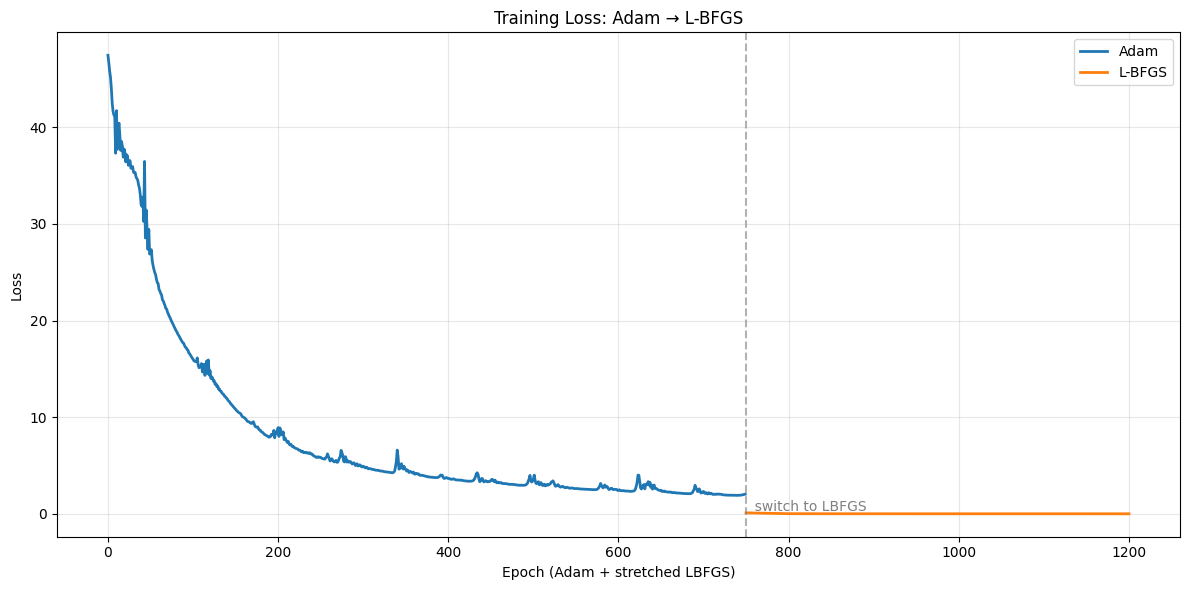

In [9]:
# X-axis for Adam
x_adam = np.arange(len(losses_adam_first))
stretch_factor = 50
# X-axis for LBFGS (stretched for visibility)
x_lbfgs = len(losses_adam_first) + np.arange(len(losses_lbfgs_further)) * stretch_factor

plt.figure(figsize=(12, 6))

# Plot Adam
plt.plot(x_adam, np.array(losses_adam_first), label="Adam", linewidth=2)

# Plot LBFGS
plt.plot(x_lbfgs, np.array(losses_lbfgs_further), label="L-BFGS", linewidth=2)

# Mark transition point
plt.axvline(len(losses_adam_first), color="gray", linestyle="--", alpha=0.6)
plt.text(len(losses_adam_first), 
            min(min(losses_adam_first), min(losses_lbfgs_further))*1.1,
            "  switch to LBFGS",
            verticalalignment="bottom",
            color="gray")

plt.xlabel("Epoch (Adam + stretched LBFGS)")
plt.ylabel("Loss")
plt.title("Training Loss: Adam → L-BFGS")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

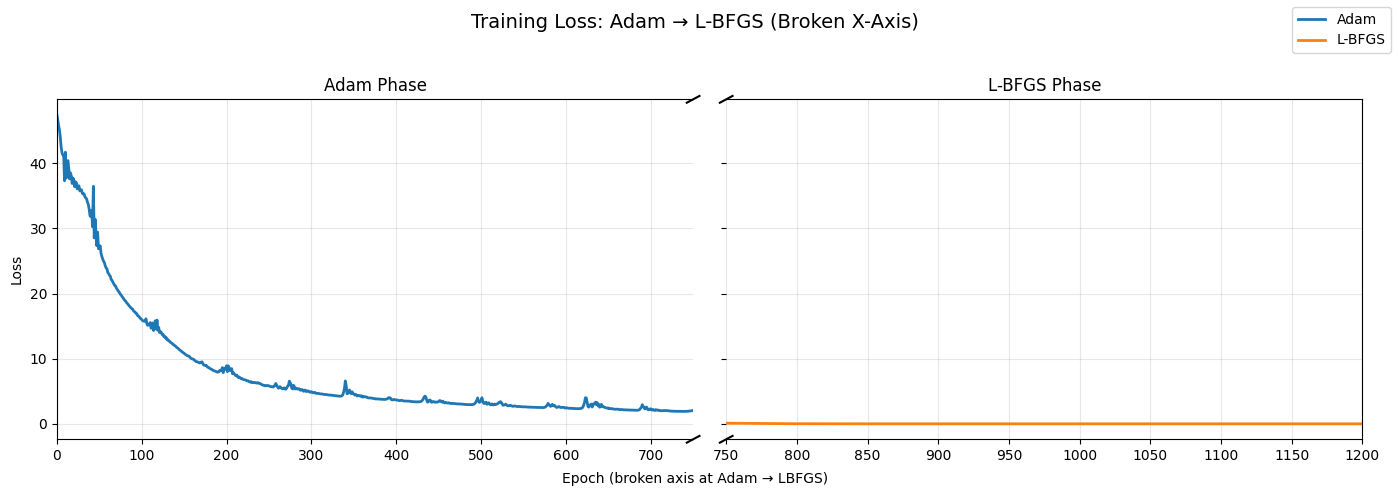

In [10]:

stretch_factor = 50
x_adam = np.arange(len(losses_adam_first))
x_lbfgs = len(losses_adam_first) + np.arange(len(losses_lbfgs_further)) * stretch_factor
split = len(losses_adam_first)

# Create two axes side by side that share the y-axis
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(14, 5))

# -----------------------------
# Plot left side (Adam region)
# -----------------------------
ax1.plot(x_adam, losses_adam_first, label="Adam", linewidth=2)
ax1.set_xlim(0, split)
ax1.set_title("Adam Phase")
ax1.set_ylabel("Loss")
ax1.grid(True, alpha=0.3)

# Hide right spine
ax1.spines['right'].set_visible(False)

# -----------------------------
# Plot right side (LBFGS region)
# -----------------------------
ax2.plot(x_lbfgs, losses_lbfgs_further, label="L-BFGS", linewidth=2, color="tab:orange")
ax2.set_xlim(x_lbfgs[0], x_lbfgs[-1])
ax2.set_title("L-BFGS Phase")
ax2.grid(True, alpha=0.3)

# Hide left spine
ax2.spines['left'].set_visible(False)

# -----------------------------
# Draw diagonal cut marks
# -----------------------------
d = 0.01  # diagonal size

# Left axis diagonals
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)
ax1.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

# Right axis diagonals
kwargs = dict(transform=ax2.transAxes, color='k', clip_on=False)
ax2.plot((-d, +d), (-d, +d), **kwargs)
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)

# -----------------------------
# Labels + Legend
# -----------------------------
fig.suptitle("Training Loss: Adam → L-BFGS (Broken X-Axis)", fontsize=14)
fig.text(0.5, 0.04, "Epoch (broken axis at Adam → LBFGS)", ha='center')

# Single legend
handles, labels = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
fig.legend(handles + handles2, labels + labels2, loc="upper right")

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()